In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from wordcloud import WordCloud

### Dataset Information

Dataset berisikan temuan-temuan positif dan negatif di perusahaan 'X' tahun 2019-2020

## DATA KNOWLEDGE



In [ ]:
#read data
df = pd.read_csv('data_2019_2020.csv')

df.head(100)

,#Task,Tanggal Pembuatan,Hari,Tanggal,Bulan,Tahun,Jam,Menit,Minggu,Hari Dalam Minggu,...,Departemen Safety Evaluator,Catatan Verifikasi,Kekerapan,Konsekuensi,Nilai Resiko,Status,Catatan Pelapor,Catatan PIC,Catatan Safety,Foto Laporan
0,2106,14-02-19 11:41,Kamis,14,2,2019,11,41,7,4,...,"Safety, Health, & Environment",NaN,Langka,Lainnya,NaN,CLOSED,NaN,NaN,NaN,http://hseautomation.beraucoal.co.id/p?q=2106
1,2416,18-02-19 10:00,Senin,18,2,2019,10,0,8,1,...,NaN,NaN,Kemungkinan Kecil,Tidak Signifikan,Low,CLOSED,NaN,NaN,NaN,http://hseautomation.beraucoal.co.id/p?q=2416
2,2457,18-02-19 12:59,Senin,18,2,2019,12,59,8,1,...,Safety Health and Environmental,NaN,Langka,Lainnya,NaN,BUKAN TEMUAN,NaN,NaN,NaN,http://hseautomation.beraucoal.co.id/p?q=2457
3,2461,18-02-19 13:52,Senin,18,2,2019,13,52,8,1,...,"Safety, Health, & Environment",NaN,Langka,Sedang,Medium,CLOSED,NaN,NaN,NaN,http://hseautomation.beraucoal.co.id/p?q=2461
4,2478,18-02-19 17:25,Senin,18,2,2019,17,25,8,1,...,"Safety, Health, & Environment",NaN,Langka,Sedang,Medium,BUKAN TEMUAN,NaN,NaN,NaN,http://hseautomation.beraucoal.co.id/p?q=2478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,12609,27-03-19 08:14,Rabu,27,3,2019,8,14,13,3,...,"Safety, Health, & Environment",NaN,Kemungkinan Kecil,Tidak Signifikan,Low,CLOSED,NaN,NaN,NaN,http://hseautomation.beraucoal.co.id/p?q=12609
96,12741,27-03-19 14:26,Rabu,27,3,2019,14,26,13,3,...,"Safety, Health, & Environment",NaN,Kemungkinan Kecil,Tidak Signifikan,Low,CLOSED,NaN,NaN,NaN,http://hseautomation.beraucoal.co.id/p?q=12741
97,12742,27-03-19 14:33,Rabu,27,3,2019,14,33,13,3,...,"Safety, Health, & Environment",NaN,Kemungkinan Kecil,Tidak Signifikan,Low,CLOSED,NaN,NaN,NaN,http://hseautomation.beraucoal.co.id/p?q=12742
98,12817,27-03-19 19:37,Rabu,27,3,2019,19,37,13,3,...,HSE & Compliance,NaN,Langka,Sedang,Medium,CLOSED,NaN,NaN,NaN,http://hseautomation.beraucoal.co.id/p?q=12817


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5335 entries, 0 to 5334
Data columns (total 46 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   #Task                        5335 non-null   int64  
 1   Tanggal Pembuatan            5335 non-null   object 
 2   Hari                         5335 non-null   object 
 3   Tanggal                      5335 non-null   int64  
 4   Bulan                        5335 non-null   int64  
 5   Tahun                        5335 non-null   int64  
 6   Jam                          5335 non-null   int64  
 7   Menit                        5335 non-null   int64  
 8   Minggu                       5335 non-null   int64  
 9   Hari Dalam Minggu            5335 non-null   int64  
 10  Sumber Data                  5335 non-null   object 
 11  NPK Pelapor                  5335 non-null   int64  
 12  Pelapor                      5335 non-null   object 
 13  Jabatan Fungsional

berdasarkan data info di atas dapat disimpulkan bahwa :
1. banyak features yang null yaitu feature `Catatan Verifikasi`,`Catatan Pelapor`, 
 `Catatan PIC`, `Catatan Safety`
2. feature `#Task`,`Hari`, `Tanggal`, `Bulan`, `Tahun`,`Jam`, `Menit`, `Minggu`, `Hari Dalam Minggu`, `NPK Pelapor`,`NPK PIC`, `NPK Safety Evaluator`,`Foto Laporan` tidak diperlukan. 


In [ ]:
#drop unnecessary features
df.drop(['#Task','Hari', 'Tanggal', 'Bulan', 'Tahun','Jam', 'Menit', 'Minggu',
              'Hari Dalam Minggu' ,'NPK Pelapor','NPK PIC', 'Golden Rule',
              'NPK Safety Evaluator','Catatan Verifikasi','Catatan Pelapor', 
              'Catatan PIC', 'Catatan Safety', 'Foto Laporan'], inplace = True , axis = 1)

In [ ]:
#handling missing value
df['Departemen Pelapor'] = df['Departemen Pelapor'].fillna('')
df['Ketidaksesuaian'] = df['Ketidaksesuaian'].fillna('')

In [ ]:
df['Ketidaksesuaian']

0           Kondisi Kendaraan/unit
1                    House Keeping
2                  Perawatan Jalan
3                   Standar Jalan 
4                   Standar Jalan 
                   ...            
5330    Kelayakan/Penggunaan Tools
5331                 House Keeping
5332               Perawatan Jalan
5333               Perawatan Jalan
5334                         Rambu
Name: Ketidaksesuaian, Length: 5335, dtype: object

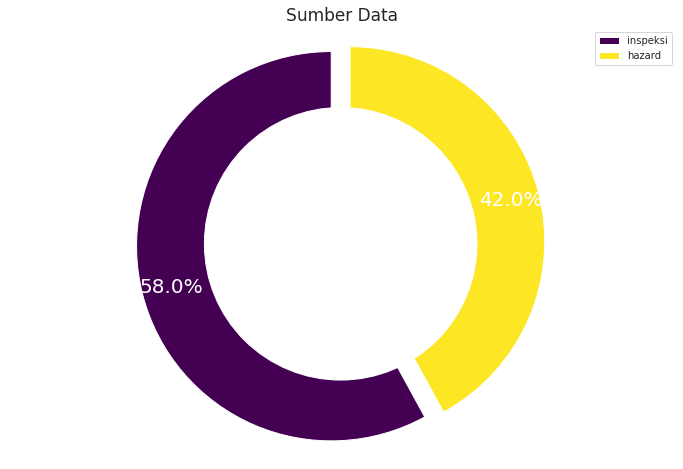

<Figure size 432x288 with 0 Axes>

In [ ]:
# Get value counts for 'Sumber Data'
value_counts = df['Sumber Data'].value_counts()

# Define labels and sizes for the pie chart
my_labels = value_counts.index.tolist()
sizes = value_counts.tolist()

# Define colors using a viridis colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(my_labels)))

# Define explode parameter for the pie chart
my_explode = [0.05, 0.05]

# Create the pie chart
plt.figure(figsize=(12, 8))
plt.pie(sizes, labels=my_labels, autopct='%1.1f%%',pctdistance=0.85, startangle=90, colors=colors, 
        explode=my_explode, textprops={'fontsize': 20, 'color': 'white'})
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

plt.title('Sumber Data', fontsize=17)
plt.axis('equal')
plt.legend()
plt.show()
plt.savefig('sumber_data.png')

In [ ]:
plt.savefig('sumber_data.png')

<Figure size 432x288 with 0 Axes>

In [ ]:
df.head()

,Tanggal Pembuatan,Sumber Data,Pelapor,Jabatan Fungsional Pelapor,Departemen Pelapor,PIC,Jabatan Fungsional PIC,Departemen PIC,Lokasi,Detail Lokasi,...,Tindakan,Due Date Penyelesaian,Tanggal Aktual Penyelesaian,Perusahaan Safety Evaluator,Nama Evaluator Car,Departemen Safety Evaluator,Kekerapan,Konsekuensi,Nilai Resiko,Status
0,14-02-19 11:41,INSPEKSI,AGUS HASYIM,Superintendent,Operation,SUYATNA,Supervisor/Officer,Plant,Workshop,BUMA Suaran KM 19,...,PERBAIKAN : berikan pendandaan,18-Feb-19,10-May-19,PT Bukit Makmur Mandiri Utama,DANANG KURNIAWAN ANGGORO,"Safety, Health, & Environment",Langka,Lainnya,NaN,CLOSED
1,18-02-19 10:00,INSPEKSI,AGUS HASYIM,Superintendent,Operation,RAMLI AZIS,Supervisor/Officer,Human Resources & General Affairs,Washing Pad,Lain-lain,...,Segera di lakukan pemotongan,22-Feb-19,19-Feb-19,NaN,NaN,NaN,Kemungkinan Kecil,Tidak Signifikan,Low,CLOSED
2,18-02-19 12:59,INSPEKSI,EKA MASRIL ZUBIR,Superintendent,"SAFETY, HEALTH , & ENVIRONMENT",NOPRIYAN,Supervisor/Officer,Safety Health and Environmental,Coal Processing Plant (CPP),CPP Binungan,...,NaN,NaN,NaN,PT Mutiara Tanjung Lestari,NOPRIYAN,Safety Health and Environmental,Langka,Lainnya,NaN,BUKAN TEMUAN
3,18-02-19 13:52,HAZARD,EKA MASRIL ZUBIR,Superintendent,"SAFETY, HEALTH , & ENVIRONMENT",DEDI PURBA,Foreman/Group Leader,Human Resources & General Affairs,Klinik,PT BUMA (Mess karyawan),...,PERBAIKAN : Melapor ke tim sipil untuk perbaikan,5-Mar-19,13-Mar-19,PT Bukit Makmur Mandiri Utama,DANANG KURNIAWAN ANGGORO,"Safety, Health, & Environment",Langka,Sedang,Medium,CLOSED
4,18-02-19 17:25,HAZARD,EKA MASRIL ZUBIR,Superintendent,"SAFETY, HEALTH , & ENVIRONMENT",DEDI PURBA,Foreman/Group Leader,Human Resources & General Affairs,Klinik,PT BUMA (Mess karyawan),...,NaN,NaN,NaN,PT Bukit Makmur Mandiri Utama,DANANG KURNIAWAN ANGGORO,"Safety, Health, & Environment",Langka,Sedang,Medium,BUKAN TEMUAN


data pada feature `Tanggal Pembuatan` dengan format datetime diganti ke date sehingga lebih gampang untuk dianalisis

In [ ]:
import datetime
# convert the datetime column to a datetime type
df['Tanggal Pembuatan']= pd.to_datetime(df['Tanggal Pembuatan'])

#cobver the datetime column to a datetime type 
df['Tanggal Pembuatan'] = df['Tanggal Pembuatan'].dt.date

df.head()

,Tanggal Pembuatan,Sumber Data,Pelapor,Jabatan Fungsional Pelapor,Departemen Pelapor,PIC,Jabatan Fungsional PIC,Departemen PIC,Lokasi,Detail Lokasi,...,Tindakan,Due Date Penyelesaian,Tanggal Aktual Penyelesaian,Perusahaan Safety Evaluator,Nama Evaluator Car,Departemen Safety Evaluator,Kekerapan,Konsekuensi,Nilai Resiko,Status
0,2019-02-14,INSPEKSI,AGUS HASYIM,Superintendent,Operation,SUYATNA,Supervisor/Officer,Plant,Workshop,BUMA Suaran KM 19,...,PERBAIKAN : berikan pendandaan,18-Feb-19,10-May-19,PT Bukit Makmur Mandiri Utama,DANANG KURNIAWAN ANGGORO,"Safety, Health, & Environment",Langka,Lainnya,NaN,CLOSED
1,2019-02-18,INSPEKSI,AGUS HASYIM,Superintendent,Operation,RAMLI AZIS,Supervisor/Officer,Human Resources & General Affairs,Washing Pad,Lain-lain,...,Segera di lakukan pemotongan,22-Feb-19,19-Feb-19,NaN,NaN,NaN,Kemungkinan Kecil,Tidak Signifikan,Low,CLOSED
2,2019-02-18,INSPEKSI,EKA MASRIL ZUBIR,Superintendent,"SAFETY, HEALTH , & ENVIRONMENT",NOPRIYAN,Supervisor/Officer,Safety Health and Environmental,Coal Processing Plant (CPP),CPP Binungan,...,NaN,NaN,NaN,PT Mutiara Tanjung Lestari,NOPRIYAN,Safety Health and Environmental,Langka,Lainnya,NaN,BUKAN TEMUAN
3,2019-02-18,HAZARD,EKA MASRIL ZUBIR,Superintendent,"SAFETY, HEALTH , & ENVIRONMENT",DEDI PURBA,Foreman/Group Leader,Human Resources & General Affairs,Klinik,PT BUMA (Mess karyawan),...,PERBAIKAN : Melapor ke tim sipil untuk perbaikan,5-Mar-19,13-Mar-19,PT Bukit Makmur Mandiri Utama,DANANG KURNIAWAN ANGGORO,"Safety, Health, & Environment",Langka,Sedang,Medium,CLOSED
4,2019-02-18,HAZARD,EKA MASRIL ZUBIR,Superintendent,"SAFETY, HEALTH , & ENVIRONMENT",DEDI PURBA,Foreman/Group Leader,Human Resources & General Affairs,Klinik,PT BUMA (Mess karyawan),...,NaN,NaN,NaN,PT Bukit Makmur Mandiri Utama,DANANG KURNIAWAN ANGGORO,"Safety, Health, & Environment",Langka,Sedang,Medium,BUKAN TEMUAN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5335 entries, 0 to 5334
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Tanggal Pembuatan            5335 non-null   object
 1   Sumber Data                  5335 non-null   object
 2   Pelapor                      5335 non-null   object
 3   Jabatan Fungsional Pelapor   5335 non-null   object
 4   Departemen Pelapor           5335 non-null   object
 5   PIC                          5335 non-null   object
 6   Jabatan Fungsional PIC       5335 non-null   object
 7   Departemen PIC               5328 non-null   object
 8   Lokasi                       5335 non-null   object
 9   Detail Lokasi                5335 non-null   object
 10  Keterangan Lokasi            5335 non-null   object
 11  PJA Pelapor                  3833 non-null   object
 12  Kategori                     5335 non-null   object
 13  Ketidaksesuaian              5335

## Exploratory Data Analysis



### Tren Departemen Pelapor 

Dengan menganalisis jumlah laporan yang dibuat oleh departemen tertentu dan tingkat keterlibatan masing-masing departermen dalam pelaporan insiden atau ketidaksesuaian. Hal ini berguna untuk mengevaluasi efektivitas program keselamatan dan kebijakan perusahaan

In [ ]:
string_cols = df.select_dtypes(include=['object']).columns
df[string_cols] = df[string_cols].apply(lambda x: x.str.lower() if isinstance(x.iloc[0], str) else x)

df.head()

,Tanggal Pembuatan,Sumber Data,Pelapor,Jabatan Fungsional Pelapor,Departemen Pelapor,PIC,Jabatan Fungsional PIC,Departemen PIC,Lokasi,Detail Lokasi,...,Tindakan,Due Date Penyelesaian,Tanggal Aktual Penyelesaian,Perusahaan Safety Evaluator,Nama Evaluator Car,Departemen Safety Evaluator,Kekerapan,Konsekuensi,Nilai Resiko,Status
0,2019-02-14,inspeksi,agus hasyim,superintendent,operation,suyatna,supervisor/officer,plant,workshop,buma suaran km 19,...,perbaikan : berikan pendandaan,18-feb-19,10-may-19,pt bukit makmur mandiri utama,danang kurniawan anggoro,"safety, health, & environment",langka,lainnya,NaN,closed
1,2019-02-18,inspeksi,agus hasyim,superintendent,operation,ramli azis,supervisor/officer,human resources & general affairs,washing pad,lain-lain,...,segera di lakukan pemotongan,22-feb-19,19-feb-19,NaN,NaN,NaN,kemungkinan kecil,tidak signifikan,Low,closed
2,2019-02-18,inspeksi,eka masril zubir,superintendent,"safety, health , & environment",nopriyan,supervisor/officer,safety health and environmental,coal processing plant (cpp),cpp binungan,...,NaN,NaN,NaN,pt mutiara tanjung lestari,nopriyan,safety health and environmental,langka,lainnya,NaN,bukan temuan
3,2019-02-18,hazard,eka masril zubir,superintendent,"safety, health , & environment",dedi purba,foreman/group leader,human resources & general affairs,klinik,pt buma (mess karyawan),...,perbaikan : melapor ke tim sipil untuk perbaikan,5-mar-19,13-mar-19,pt bukit makmur mandiri utama,danang kurniawan anggoro,"safety, health, & environment",langka,sedang,Medium,closed
4,2019-02-18,hazard,eka masril zubir,superintendent,"safety, health , & environment",dedi purba,foreman/group leader,human resources & general affairs,klinik,pt buma (mess karyawan),...,NaN,NaN,NaN,pt bukit makmur mandiri utama,danang kurniawan anggoro,"safety, health, & environment",langka,sedang,Medium,bukan temuan


In [ ]:
unique_sumber_data= df['Sumber Data'].nunique()
unique_jabatan_pelapor = df['Jabatan Fungsional Pelapor'].nunique()
unique_dept_pelapor = df['Departemen Pelapor'].nunique()
unique_jab_pic = df['Jabatan Fungsional PIC'].nunique()
unique_dept_pic = df['Departemen PIC'].nunique()
unique_lokasi = df['Lokasi'].nunique()
unique_kategori = df['Kategori'].nunique()
unique_ketidaksesuaian = df['Ketidaksesuaian'].nunique()
unique_tipe_tindakan = df['Tipe Tindakan'].nunique()
unique_akar_permasalahan = df['Akar Permasalahan'].nunique()
unique_tindakan = df['Tindakan'].nunique()
unique_perusahaan = df['Perusahaan Safety Evaluator'].nunique()
unique_evaluator= df['Nama Evaluator Car'].nunique()
unique_dept_evaluator = df['Departemen Safety Evaluator'].nunique()
unique_kekerapan = df['Kekerapan'].nunique()
unique_resiko= df['Nilai Resiko'].nunique()
unique_status = df['Status'].nunique()

print('Count the unique each features')
print('-------------------------------')
print('Sumber Data : ', unique_sumber_data)
print('Jabatan Fungsional Pelapor: ', unique_jabatan_pelapor)
print('Departemen Pelapor: ', unique_dept_pelapor)
print('Jabatan Fungsional PIC: ', unique_jab_pic )
print('Departemen PIC: ', unique_dept_pic )
print('Lokasi: ', unique_lokasi )
print('Kategori: ', unique_kategori )
print('Ketidaksesuaian: ', unique_ketidaksesuaian )
print('Tipe Tindakan: ', unique_tipe_tindakan )
print('Akar Permasalahan: ', unique_akar_permasalahan )
print('Tindakan: ', unique_tindakan )
print('Perusahaan Safety Evaluator: ', unique_perusahaan )
print('Nama Evaluator Car:', unique_evaluator)
print('Departemen Safety Evaluator: ',unique_dept_evaluator )
print('Kekerapan: ', unique_kekerapan )
print('Nilai Resiko: ', unique_resiko)
print('Status: ', unique_status)

Count the unique each features
-------------------------------
Sumber Data :  2
Jabatan Fungsional Pelapor:  9
Departemen Pelapor:  12
Jabatan Fungsional PIC:  10
Departemen PIC:  56
Lokasi:  23
Kategori:  3
Ketidaksesuaian:  58
Tipe Tindakan:  2
Akar Permasalahan:  2119
Tindakan:  2137
Perusahaan Safety Evaluator:  7
Nama Evaluator Car: 12
Departemen Safety Evaluator:  9
Kekerapan:  2
Nilai Resiko:  3
Status:  12


### Report Per Departemen PIC

In [ ]:
# table 
dept_grp = df.groupby('Departemen PIC').size().reset_index()
dept_grp.columns = ['target', 'total']
dept_grp['%'] = round(dept_grp['total']*100/sum(dept_grp['total'],2))
dept_grp.sort_values(by='total', ascending = False).style.background_gradient(cmap='Greens')

,target,total,%
37,plant,1932,36.000000
32,operation,1093,21.000000
21,human resources & general affairs,995,19.000000
43,road maintenance,183,3.000000
42,pscm,175,3.000000
48,"safety, health, & environment",168,3.000000
5,coal hauling & coal processing plant,145,3.000000
49,security department,132,2.000000
4,catering departement,59,1.000000
24,infrastruktur,55,1.000000


More than one name for one department 

1. `safety, health, & environment` , `safety health and environmental` , `safety, health , & environment` , `safety health and environmental`, `she`,`she departement`, `safety, health & environment`, `environment department	`
2. `operation` , `operation department`, `bc it operation department`, `port & barging operation department	`, `safety operation department`
3. `service`,`service departmen`, `emergency responses & safety services department` , `service departement`, `general services department`, `general service departemen`, `gs`,`general service` , `service`
4. `plant` , `plant departement`, 
5. `maintenace` , `asset & facility infrastructure maintenance department`, `maintenance departement`, `plant & maintenance` , `road maintenance`, `maintenace`
6. `logistic`,`logistic department` , `logistic departement`

In [ ]:
# Cleaning departmen
# define the list of values to replace
safety_replace = ['safety health and environmental', 'safety, health , & environment', 'safety health and environmental', 'she', 'she departement', 'safety, health & environment','environment department']
operation_replace =['operation department', 'bc it operation department', 'port & barging operation department', 'safety operation department']
service_replace =['service departmen', 'emergency responses & safety services department' , 'service departement', 'general services department', 'general service departemen', 'gs','general service',
                  'general service departement', 'general services departement', ' gs', ' gs ']
plant_replace = ['plant departement']
maintenace_replace =['asset & facility infrastructure maintenance department', 'maintenance departement', 'plant & maintenance' , 'road maintenance','maintenance']
logistic_replace = ['logistic department' , 'logistic departement']

# replace the values in the "Departemen PIC" 
df["Departemen PIC"] = df["Departemen PIC"].replace(safety_replace, 'safety, health, & environment')
df["Departemen PIC"] = df["Departemen PIC"].replace(operation_replace, 'operation')
df["Departemen PIC"] = df["Departemen PIC"].replace(service_replace, 'service')
df["Departemen PIC"] = df["Departemen PIC"].replace(plant_replace, 'plant')
df["Departemen PIC"] = df["Departemen PIC"].replace(maintenace_replace, 'maintenace')
df["Departemen PIC"] = df["Departemen PIC"].replace(logistic_replace, 'logistic')


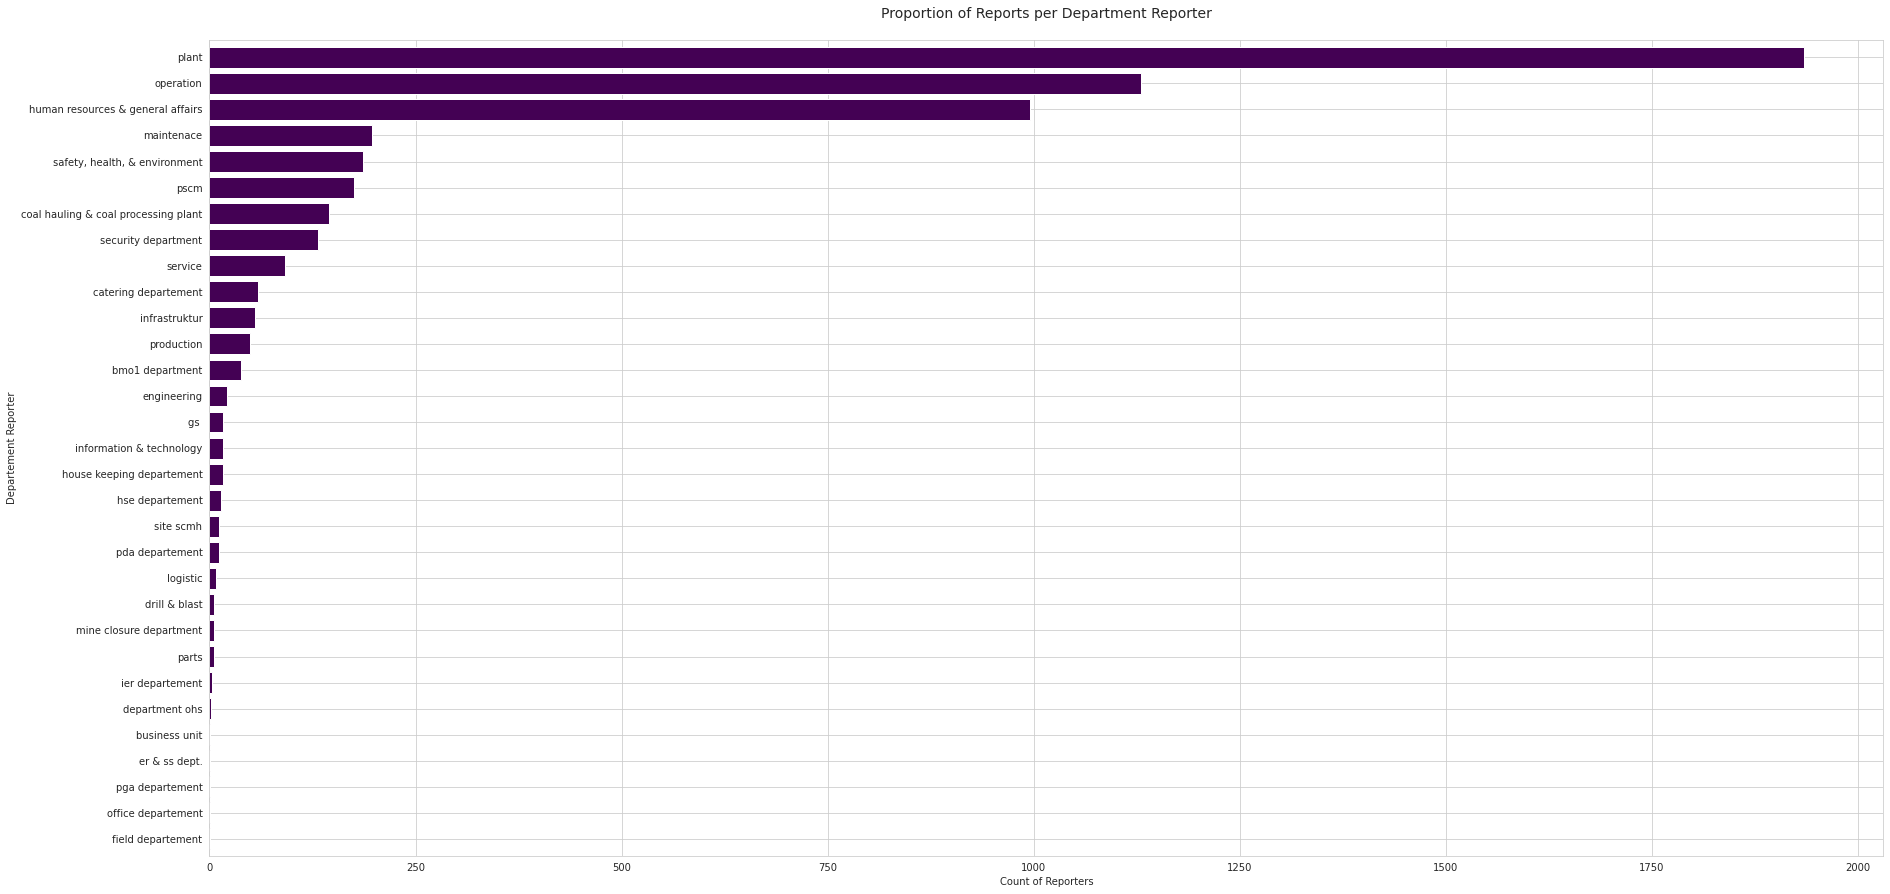

In [ ]:
# visualization
sns.set_style('whitegrid')
fig = plt.figure(figsize = (30,15))
grp = df['Departemen PIC'].value_counts().sort_values(ascending = True)
grp.plot(kind='barh', color ='#440154', width = 0.8)
plt.title('Proportion of Reports per Department Reporter\n', fontsize = 14)
plt.ylabel('Departement Reporter')
plt.xlabel('Count of Reporters')
plt.show()

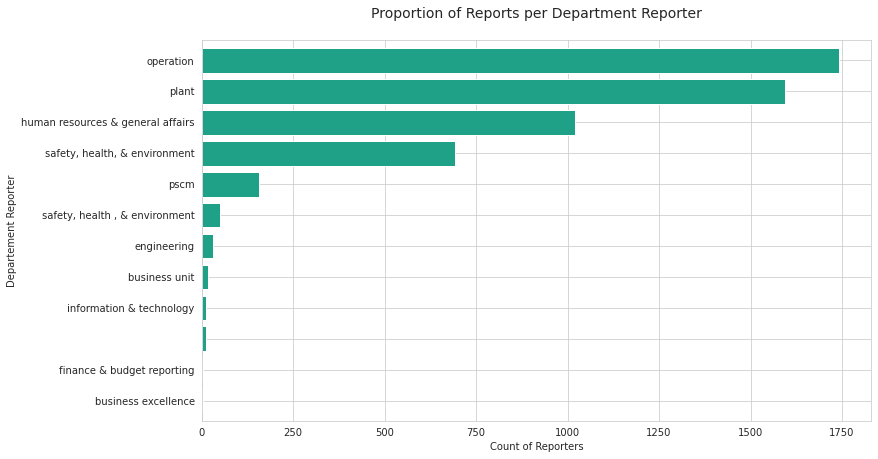

In [ ]:
# visualization
sns.set_style('whitegrid')
fig = plt.figure(figsize = (12,7))
grp = df['Departemen Pelapor'].value_counts().sort_values(ascending = True)
grp.plot(kind='barh', color ='#1fa187', width = 0.8)
plt.title('Proportion of Reports per Department Reporter\n', fontsize = 14)
plt.ylabel('Departement Reporter')
plt.xlabel('Count of Reporters')
plt.show()

### Report Per Location

In [ ]:
# table 
lokasi_grp = df.groupby('Lokasi').size().reset_index()
lokasi_grp.columns = ['target', 'total']
lokasi_grp['%'] = round(lokasi_grp['total']*100/sum(lokasi_grp['total'],2))
lokasi_grp.sort_values(by='total', ascending = False).style.background_gradient(cmap='Greens')

,target,total,%
22,workshop,2272,43.000000
7,hauling road,909,17.000000
1,camp/mess,664,12.000000
14,office,273,5.000000
3,coal processing plant (cpp),264,5.000000
19,warehouse,195,4.000000
5,fuel station,179,3.000000
12,lain-lain,147,3.000000
0,area transportasi,85,2.000000
9,jetty/ dermaga,83,2.000000


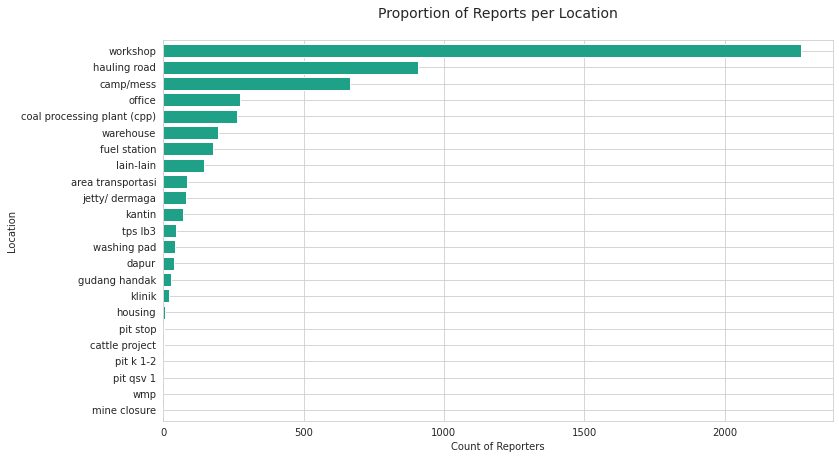

In [ ]:
# visualization
sns.set_style('whitegrid')
fig = plt.figure(figsize = (12,7))
grp = df['Lokasi'].value_counts().sort_values(ascending = True)
grp.plot(kind='barh', color ='#1fa187', width = 0.8)
plt.title('Proportion of Reports per Location\n', fontsize = 14)
plt.ylabel('Location')
plt.xlabel('Count of Reporters')
plt.show()

### Report Per Category


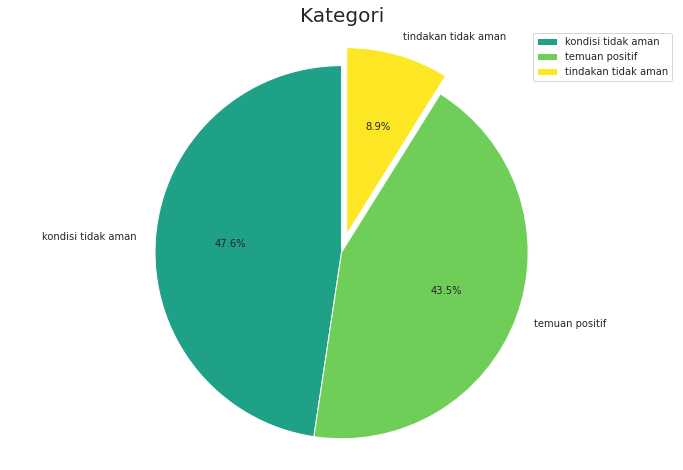

In [ ]:
plt.figure(figsize=(12,8))

#Extract feature data
kategori = df['Kategori']

# Count the number of occurrences for each unique value
value_counts =kategori.value_counts()

# Get labels and size
my_labels = value_counts.index.tolist()
sizes = value_counts.tolist()

my_colors = ['#1fa187','#6ece58', '#fde725']
my_explode = (0, 0, 0.1)
plt.pie(value_counts, labels=my_labels, autopct='%1.1f%%', startangle=90, shadow = False, colors=my_colors, explode=my_explode, textprops={'fontsize': 10})
plt.title('Kategori', fontsize=20)
plt.axis('equal')
plt.legend()
plt.show()

### Perusahaan Safety Evaluator

In [ ]:
# table 
perusahaan_grp = df.groupby('Perusahaan Safety Evaluator').size().reset_index()
perusahaan_grp.columns = ['target', 'total']
perusahaan_grp['%'] = round(perusahaan_grp['total']*100/sum(perusahaan_grp['total'],2))
perusahaan_grp.sort_values(by='total', ascending = False).style.background_gradient(cmap='Greens')

,target,total,%
2,pt bukit makmur mandiri utama,749,73.000000
1,pt berau coal energy,136,13.000000
3,pt mutiara tanjung lestari,101,10.000000
0,pt berau coal,24,2.000000
6,pt united tractors pandu engineering,9,1.000000
5,pt saptaindra sejati,4,0.000000
4,pt ricobana abadi,1,0.000000


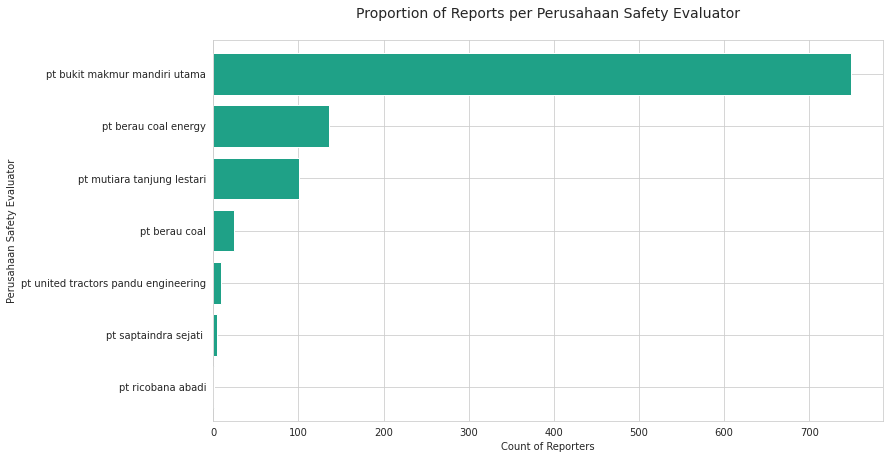

In [ ]:
# visualization
sns.set_style('whitegrid')
fig = plt.figure(figsize = (12,7))
grp = df['Perusahaan Safety Evaluator'].value_counts().sort_values(ascending = True)
grp.plot(kind='barh', color ='#1fa187', width = 0.8)
plt.title('Proportion of Reports per Perusahaan Safety Evaluator\n', fontsize = 14)
plt.ylabel('Perusahaan Safety Evaluator')
plt.xlabel('Count of Reporters')
plt.show()

### Status


In [ ]:
# table 
status_grp = df.groupby('Status').size().reset_index()
status_grp.columns = ['target', 'total']
status_grp['%'] = round(status_grp['total']*100/sum(status_grp['total'],2))
status_grp.sort_values(by='total', ascending = False).style.background_gradient(cmap='Greens')

,target,total,%
1,closed,4762,89.000000
0,bukan temuan,458,9.000000
11,submitted,28,1.000000
8,progress,22,0.000000
2,confirmed,21,0.000000
3,done,21,0.000000
9,reject 1,10,0.000000
6,open,7,0.000000
5,eskalasi 2,2,0.000000
7,overdue,2,0.000000


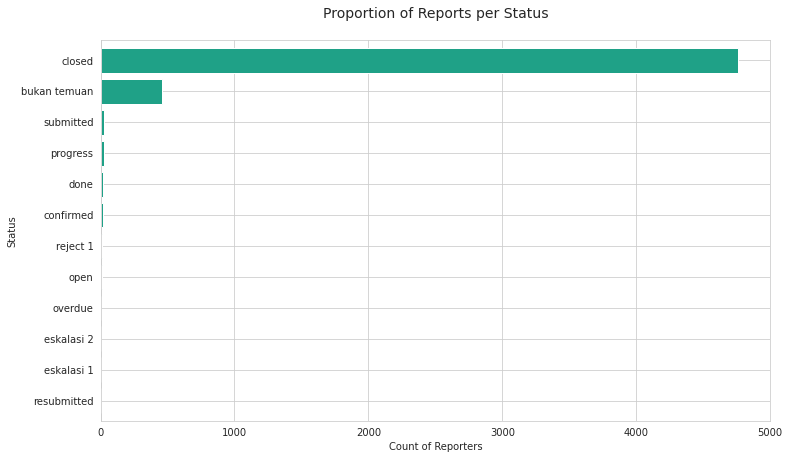

In [ ]:
# visualization
sns.set_style('whitegrid')
fig = plt.figure(figsize = (12,7))
grp = df['Status'].value_counts().sort_values(ascending = True)
grp.plot(kind='barh', color ='#1fa187', width = 0.8)
plt.title('Proportion of Reports per Status\n', fontsize = 14)
plt.ylabel('Status')
plt.xlabel('Count of Reporters')
plt.show()

## Distribusi Ketidaksesuaian Masing-Masing Departemen Pelapor

**1. Ketidaksesuaian vs Departemen Pelapor (operation)**

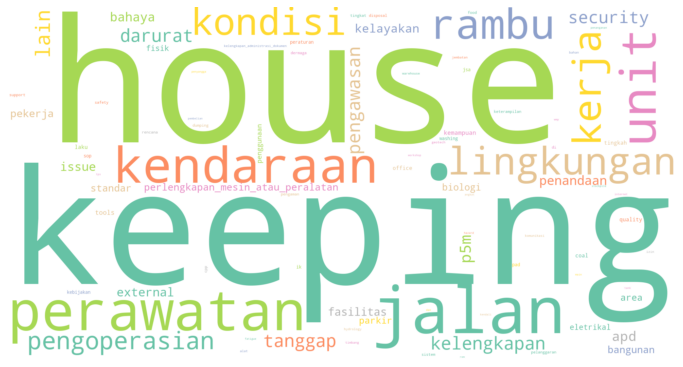

In [ ]:
operation = df[df['Departemen Pelapor']=='operation']
title_operation = ' '.join(operation['Ketidaksesuaian'].tolist())

word_cloud1 = WordCloud(collocations = False, background_color = 'white',
                        width = 2048, height = 1080, colormap='Set2').generate(title_operation)

plt.figure(figsize = (12, 12))
plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis("off")
plt.show()

 **2. Ketidaksesuaian vs Departemen Pelapor (plant)**

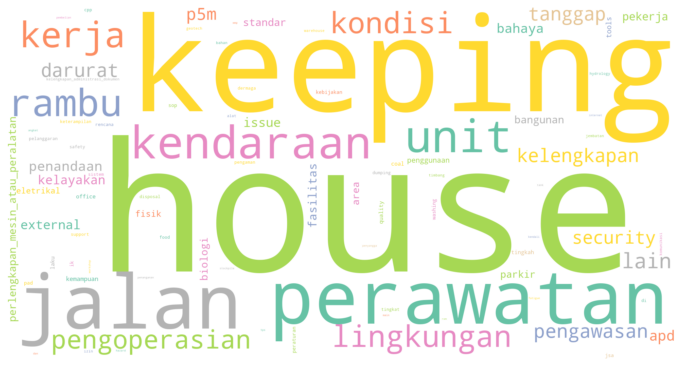

In [ ]:
plant = df[df['Departemen Pelapor']=='plant']
title_plant = ' '.join(operation['Ketidaksesuaian'].tolist())

word_cloud1 = WordCloud(collocations = False, background_color = 'white',
                        width = 2048, height = 1080, colormap='Set2').generate(title_plant)

plt.figure(figsize = (12, 12))
plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis("off")
plt.show()

<ipython-input-28-38a52d664ac2>:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data_departemen = df[df['Departemen Pelapor'] == operation]


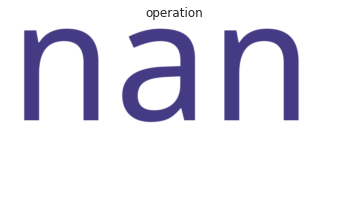

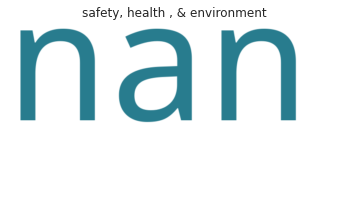

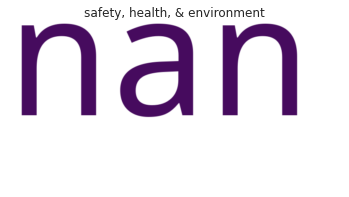

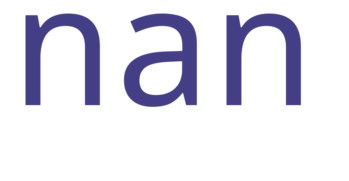

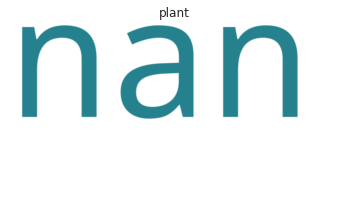

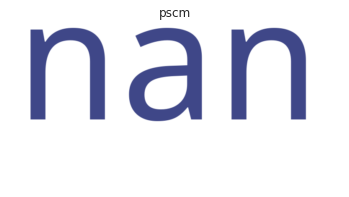

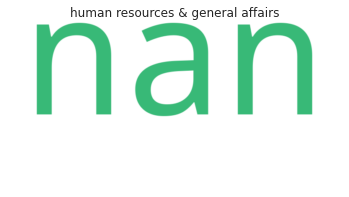

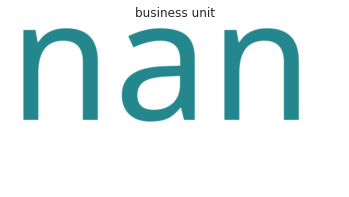

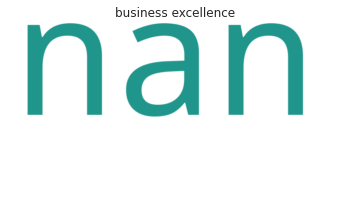

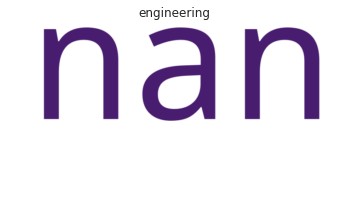

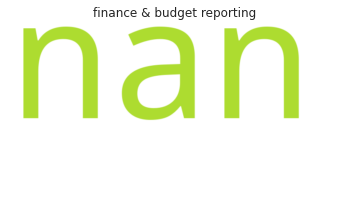

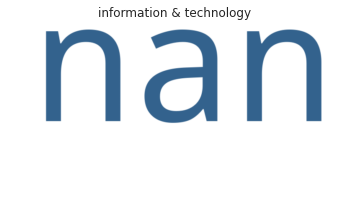

In [ ]:


for departemen in df['Departemen Pelapor'].unique():
    data_departemen = df[df['Departemen Pelapor'] == operation]
    text = ' '.join(str(x) for x in data_departemen['Ketidaksesuaian'].tolist())
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100, contour_width=3, contour_color='steelblue')
    wordcloud.generate(text)

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(departemen)
    plt.show()



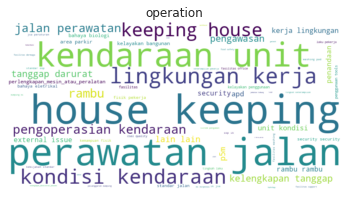

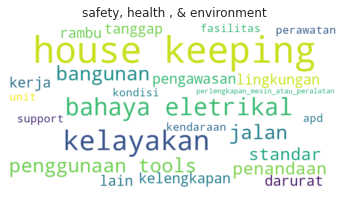

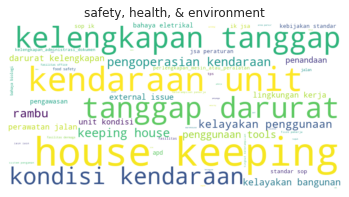

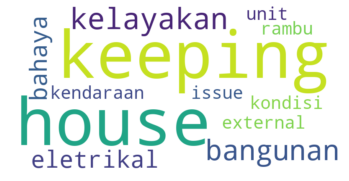

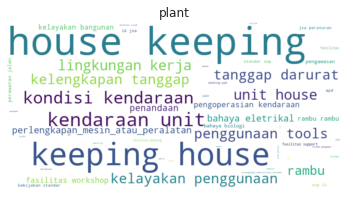

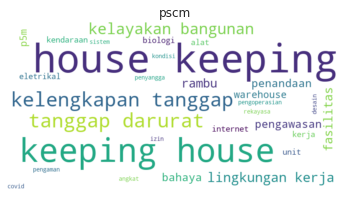

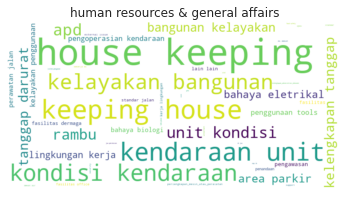

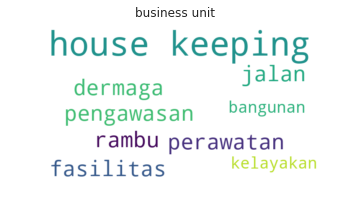

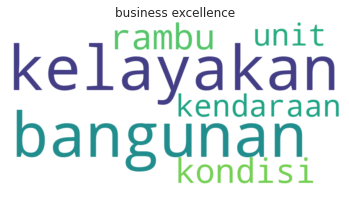

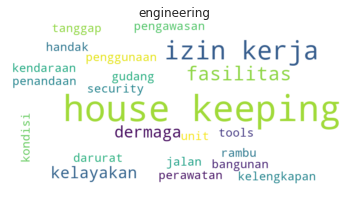

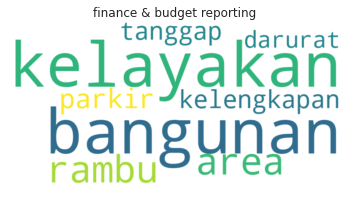

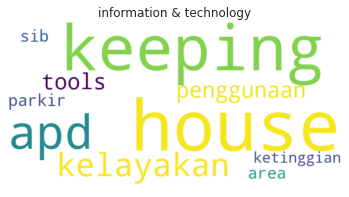

In [ ]:
for departemen in df['Departemen Pelapor'].unique():
    data_departemen = df[df['Departemen Pelapor'] == departemen].dropna(subset=['Ketidaksesuaian'])
    if not data_departemen.empty:
        text = ' '.join(str(x) for x in data_departemen['Ketidaksesuaian'].tolist())
        wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100, contour_width=3, contour_color='steelblue')
        wordcloud.generate(text)

        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(departemen)
        plt.show()

## Report Masing-masing Departemen pelapor per bulan

#gabungain grafiknya

<ipython-input-30-94712cf9880a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dept_data['Tanggal Pembuatan'] = pd.to_datetime(dept_data['Tanggal Pembuatan'], format='%Y-%m-%d')
<ipython-input-30-94712cf9880a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dept_data['Tanggal Pembuatan'] = pd.to_datetime(dept_data['Tanggal Pembuatan'], format='%Y-%m-%d')
<ipython-input-30-94712cf9880a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

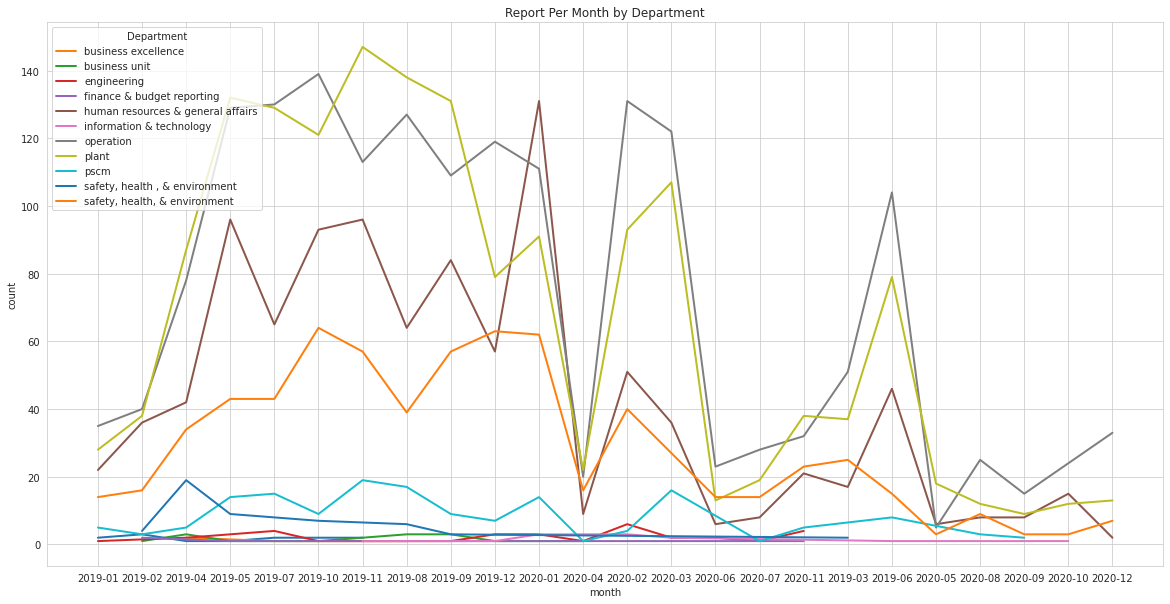

In [ ]:
# Group by departemen and count the number of entries
dept_grp = df.groupby('Departemen Pelapor').size().reset_index()
dept_list = dept_grp['Departemen Pelapor'].tolist()

# Create one figure and one axis for all the plots
fig, ax = plt.subplots(figsize=(20, 10))

# Loop through each department and create a report per month
for i, dept in enumerate(dept_list):
    # Subset the data for the current department
    dept_data = df[df['Departemen Pelapor'] == dept]
    # Change format data 'Tanggal Pembuatan'
    dept_data['Tanggal Pembuatan'] = pd.to_datetime(dept_data['Tanggal Pembuatan'], format='%Y-%m-%d')
    # Group by month and count the number of entries
    grp = dept_data['Tanggal Pembuatan'].groupby(dept_data['Tanggal Pembuatan'].dt.to_period("M")).agg('count').reset_index(name='count')
    grp.rename(columns={'Tanggal Pembuatan': 'month'}, inplace=True)
    grp['month'] = grp['month'].astype(str)
    # Plot the report per month for the current department on the same axis
    sns.lineplot(x="month", y="count", data=grp, ax=ax, linewidth=2, label=dept)

# Set the title and legend for the figure
plt.title("Report Per Month by Department")
plt.legend(title='Department', loc='upper left')

# Show the figure
plt.show()

In [ ]:
# Create a new column for the year
df['year'] = df['Tanggal Pembuatan'].dt.year

# Group by department, year, and month, and count the number of entries
grp = df.groupby(['Departemen Pelapor', 'year', df['Tanggal Pembuatan'].dt.to_period("M")])['Tanggal Pembuatan'].count().reset_index(name='count')

# Convert month to string
grp['Tanggal Pembuatan'] = grp['Tanggal Pembuatan'].astype(str)

# Plot the report per month for each department and year
sns.relplot(x="Tanggal Pembuatan", y="count", data=grp, hue='year', style='Departemen Pelapor', kind="line", height=5, aspect=5)
plt.title("Report Per Month")
plt.show()

AttributeError: ignored

### Evaluation of of Tanggal Pembuatan, Due Date penyelesaian dan Tanggal actual penyelesaian

In [ ]:
# Convert date columns to datetime format
df['Tanggal Pembuatan'] = pd.to_datetime(df['Tanggal Pembuatan'])
df['Due Date Penyelesaian'] = pd.to_datetime(df['Due Date Penyelesaian'])
df['Tanggal Aktual Penyelesaian'] = pd.to_datetime(df['Tanggal Aktual Penyelesaian'])

# Calculate the counts for each feature per month
monthly_counts = df.groupby(pd.Grouper(key='Tanggal Pembuatan', freq='M'))[['Due Date Penyelesaian', 'Tanggal Aktual Penyelesaian']].count()

# Create a line chart with the monthly counts for each feature
plt.plot(monthly_counts.index, monthly_counts['Due Date Penyelesaian'], label='Due Date Penyelesaian')
plt.plot(monthly_counts.index, monthly_counts['Tanggal Aktual Penyelesaian'], label='Tanggal Aktual Penyelesaian')
plt.plot(monthly_counts.index, df.groupby(pd.Grouper(key='Tanggal Pembuatan', freq='M')).size(), label='Tanggal Pembuatan')

# Set the chart title and axis labels
plt.title('Counts by Month')
plt.xlabel('Month')
plt.ylabel('Count')

# Set the color map to 'viridis'
plt.set_cmap('viridis')

# Add a legend and show the plot
plt.legend()
plt.show()


